# CREAR DATAFRAME

In [2]:
#Importar todas las librerías necesarias
import random
import pandas as pd

In [3]:
#Inicializar algunas variables que después modificaremos
hostnames = []
dataset = []
df = None

In [4]:
#Crear una función para generar los hostnames en base a unas reglas
def set_hostnames(number_of_hosts: int) -> None:
    os_prefix = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1  # 40% Linux | 30% Solaris | 20% AIX | 10% HP-UX
    enviroments = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30 # Development: 10% |Integration: 10% |Testing: 25% |Staging: 25% | Production: 30%
    alpha_3_country_codes = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30 # Norway: 6% | France: 9% | Italy: 16% | Spain: 16% | Germany: 23% |Ireland: 30%
    grupo_alpha = []
    
    for i in range(number_of_hosts):
        country = random.choice(alpha_3_country_codes)
        hostname = random.choice(os_prefix) + random.choice(enviroments)
        hostname += country
        grupo_alpha.append(hostname)
        hostname += str(grupo_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)

In [5]:
#Función para obtener SO
def get_os(number_of_host: str) -> str:
    if number_of_host.startswith('L'):
        return 'Linux'
    elif number_of_host.startswith('S'):
        return 'Solaris'
    elif number_of_host.startswith('A'):
        return 'AIX'
    elif number_of_host.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unknown'

In [6]:
# función para obtener entorno
def get_environment(number_of_host: str) -> str:
    if number_of_host[1] == 'D':
        return 'Development'
    elif number_of_host[1] == 'I':
        return 'Integration'
    elif number_of_host[1] == 'T':
        return 'Testing'
    elif number_of_host[1] == 'S':
        return 'Staging'
    elif number_of_host == 'P':
        return 'Production'
    else:
        return 'Unknown'

In [7]:
#Función para obtener país
def get_country(number_of_host: str) -> str:
    if number_of_host[2:5] == 'NOR':
        return 'Norway'
    elif number_of_host[2:5] == 'FRA':
        return 'France'
    elif number_of_host[2:5] == 'ITA':
        return 'Italy'
    elif number_of_host[2:5] == 'ESP':
        return 'Spain'
    elif number_of_host[2:5] == 'DEU':
        return 'Germany'
    elif number_of_host[2:5] == 'IRL':
        return 'Ireland'
    else:
        return 'Unknown'

In [8]:
def set_dataframe(number: int) -> None:
    global df
    
    set_hostnames(number)
    for number_of_host in hostnames:
        dataset.append({
            'Host number': number_of_host,
            'Operating system': get_os(number_of_host),
            'Environment':get_environment(number_of_host),
            'Country':get_country(number_of_host),
            'Number':int(number_of_host[-2:])
        })
        
    df = pd.DataFrame(dataset)

In [9]:
set_dataframe(1500)

In [10]:
df

,Host number,Operating system,Environment,Country,Number
0,APITA001,AIX,Unknown,Italy,1
1,ATDEU001,AIX,Testing,Germany,1
2,SSITA001,Solaris,Staging,Italy,1
3,LSDEU001,Linux,Staging,Germany,1
4,APNOR001,AIX,Unknown,Norway,1
...,...,...,...,...,...
1495,HTDEU009,HP-UX,Testing,Germany,9
1496,LTNOR015,Linux,Testing,Norway,15
1497,ATIRL032,AIX,Testing,Ireland,32
1498,LPNOR006,Linux,Unknown,Norway,6


In [11]:
#Guardar el dataframe en un CSV
df.to_csv('hosts.csv', header=True, index=False)
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,Host number,Operating system,Environment,Country,Number
0,APITA001,AIX,Unknown,Italy,1
1,ATDEU001,AIX,Testing,Germany,1
2,SSITA001,Solaris,Staging,Italy,1
3,LSDEU001,Linux,Staging,Germany,1
4,APNOR001,AIX,Unknown,Norway,1
...,...,...,...,...,...
1495,HTDEU009,HP-UX,Testing,Germany,9
1496,LTNOR015,Linux,Testing,Norway,15
1497,ATIRL032,AIX,Testing,Ireland,32
1498,LPNOR006,Linux,Unknown,Norway,6


# GRÁFICOS

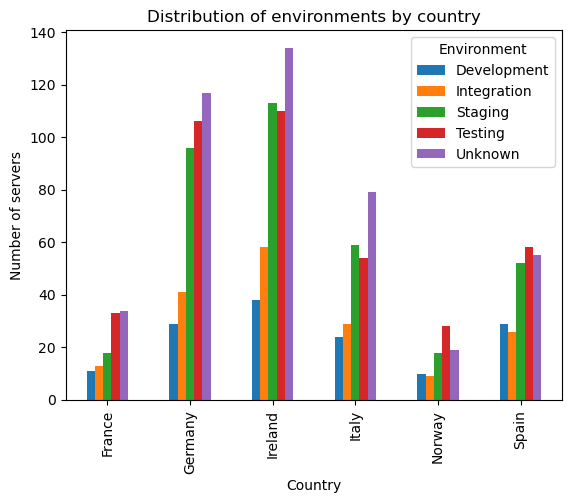

In [12]:
#Generar un único gráfico agrupando para cada país (country) los entornos (enviroment)
import matplotlib.pyplot as plt

hosts_df.groupby(['Country', 'Environment']).size().unstack().plot(kind='bar')



plt.xlabel('Country')
plt.ylabel('Number of servers')
plt.title('Distribution of environments by country')

plt.show()

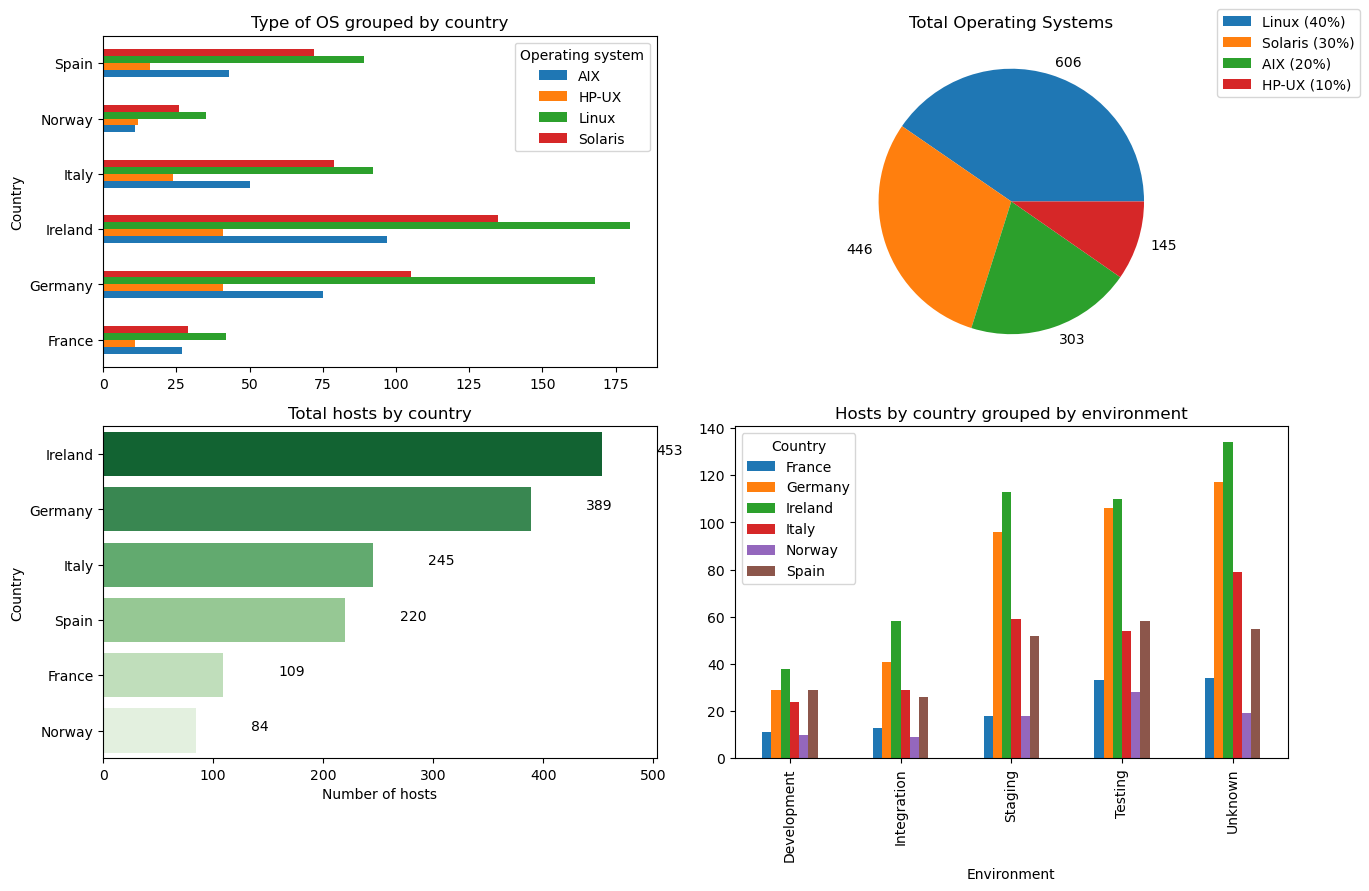

In [13]:
#Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas

import seaborn as sea

fig, axs = plt.subplots(2, 2)

axs[0, 0].set_title('Type of OS grouped by country')
hosts_df.groupby(['Country', 'Operating system']).size().unstack().plot(kind='barh', ax=axs[0, 0])

axs[0, 1].set_title('Total Operating Systems')
os_counts = hosts_df['Operating system'].value_counts()
axs[0, 1].pie(os_counts.values, labels=os_counts)
labels = [f"{name} ({val/len(hosts_df)*100:.0f}%)"          for name, val in zip(os_counts.index, os_counts.values)]
axs[0, 1].legend(labels=labels, bbox_to_anchor=(1.1, 1.1))

axs[1, 0].set_title('Total hosts by country')
host_counts = hosts_df['Country'].value_counts()
palette = sea.color_palette("Greens_r", len(host_counts))
sea.barplot(x=host_counts.values, y=host_counts.index, palette=palette, ax=axs[1, 0])
for i, v in enumerate(host_counts.values):
    axs[1, 0].text(v + 50, i, str(v), color='black')
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')
axs[1, 0].set_xlim([0, host_counts.values.max()+50])

axs[1, 1].set_title('Hosts by country grouped by environment')
hosts_df.groupby(['Environment', 'Country']).size().unstack().plot(kind='bar', ax=axs[1, 1])

fig = plt.gcf()
fig.set_size_inches(14, 9)
fig.tight_layout()

plt.show()